#### Play around with the first return maps using the .pickle files generated from main.py

The problem is that first return maps rely on you knowing the order of the ISIs too. 

In [1]:
import sys
sys.path.append("..\\") # parent directory
from AQUA_class import AQUA
from plotting_functions import *

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle

In [ ]:
# Need to select a specific set of parameter values and generate the ISI return map.
# In the paper, I_inj is fixed, and f is varied across rows. tau is varied across columns. 
# e is fixed.

# Easier to just re-run the simulation with the specific conditions needed.
# using IB neuron


# sim params
T = 2000
dt = 0.01
N_iter = int(T/dt)

#injected current 
I_height = 10
I_inj = I_height*np.ones(N_iter)


# IB neuron params
a = 0.02
b = 0.2
c = -55
d = 4

# interesting values (0.02, 2.6, 1.4), (0.02, 3.0, 1.4), (0.02, 3.0, 0.8).
# spiking chaos: (0.02, 2.6, 1.4)
# bursting chaos: (0.02, 3.0, 0.8)
# inhibitory: (0.1, -0.8, 0.0), (0.02, -0.8, 0.4)
e = 0.02
f = 3.0
tau = 0.8

x_start = np.array([c, 0, 0])
t_start = np.array([0])

neuron = AQUA(a, b, c, d, e, f, tau)

neuron.Initialise(x_start, t_start)

_, _, spikes = neuron.update_RK2(dt, N_iter, I_inj)

ISI = np.ediff1d(spikes[-int(0.5*len(spikes)):])
print(ISI)

[ 6.49 11.82  7.34 13.33  6.46 11.71  7.42 13.28  6.47 11.75  7.41 13.23
  6.5  11.84  7.34 13.36  6.45 11.71  7.43 13.31  6.46 11.74  7.4  13.34
  6.45 11.68  7.44 13.26  6.48 11.78  7.38 13.38  6.43 11.62  7.51 13.21
  6.51 11.9   7.29 13.29  6.48 11.83  7.33 13.23  6.5  11.83  7.33 13.29
  6.47 11.78  7.39 13.37  6.43 11.62  7.5  13.32  6.46 11.77  7.4  13.33
  6.46 11.76  7.39 13.3   6.46 11.71  7.43 13.24  6.51 11.9   7.3  13.32
  6.47 11.8   7.36 13.24  6.5  11.86  7.31 13.24  6.5  11.84  7.34 13.33
  6.45 11.69  7.45 13.29  6.48 11.77  7.38 13.27  6.49 11.86  7.32 13.23
  6.51 11.89  7.31 13.26]


Text(0.5, 1.0, 'First return map of the IB neuron')

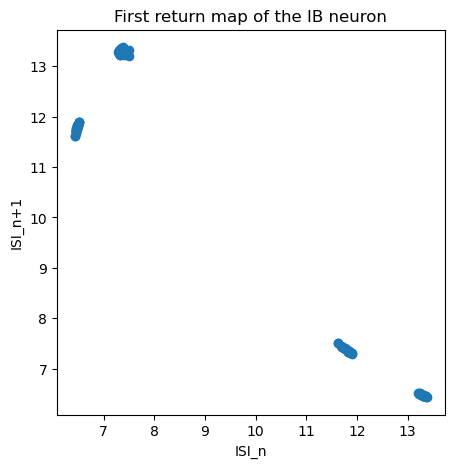

In [3]:
#Plot the first return map

fig, ax = plt.subplots(figsize = (5, 5))

plt.scatter(ISI[:-1], ISI[1:])

plt.xlabel('ISI_n')
plt.ylabel('ISI_n+1')

plt.title('First return map of the IB neuron')
    